EXPLORING DATETIME IN PYTHON

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, timezone

In [3]:
df = pd.read_csv('capital-onebike.csv')
df.head(2)

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual


In [4]:
#find the numer of cutomers that rented bikes before and after noon

df['Start date'] = pd.to_datetime(df['Start date'])
trip_counts = {'Before Noon':0, 'After Noon':0}

for index, row in df.iterrows():
    if row['Start date'].hour < 12:
        trip_counts['Before Noon'] += 1
    else: 
        trip_counts['After Noon'] += 1

print(trip_counts)

{'Before Noon': 94, 'After Noon': 196}


In [5]:
am_count = 0
pm_count = 0

for trips in df['Start date']: 
    if trips.hour < 12: 
        am_count += 1
    else:
        pm_count += 1

print(f'AM: {am_count}, PM : {pm_count}')

AM: 94, PM : 196


In [6]:
#finding the peak hour and number of rentals in that hour
df['hour'] = df['Start date'].dt.hour

peak_hour_count = df['hour'].value_counts().sort_index()
peak_hour = peak_hour_count.idxmax()
peak_count = peak_hour_count.max()

print(f'The peak hour for bike renting is {peak_hour}:00, while the hiighest rental is {peak_count}')



The peak hour for bike renting is 8:00, while the hiighest rental is 26


In [13]:
#calculating time elapsed between start and end date (pick up and drop off)
df['Start date'] = pd.to_datetime(df['Start date'])
df['End date'] = pd.to_datetime(df['End date'])

total_duration = []

for index, row in df.iterrows():
    durations = row['End date'] - row['Start date']
    total_duration.append(durations)

df['Total duration'] = total_duration
print(df['Total duration'].head(2))

0   0 days 00:03:01
1   0 days 02:07:02
Name: Total duration, dtype: timedelta64[ns]


In [29]:
#understanding timedelta

delta = timedelta(days = 5)
now = datetime.now()
future = now + delta
past = now - delta
print(delta)
print(now)
print(future)
print(past)

5 days, 0:00:00
2025-04-12 11:42:13.815471
2025-04-17 11:42:13.815471
2025-04-07 11:42:13.815471


In [35]:
#number of rides by member type

No_of_rides = df['Member type'].value_counts()
print(No_of_rides)

Member type
Member    236
Casual     54
Name: count, dtype: int64


Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

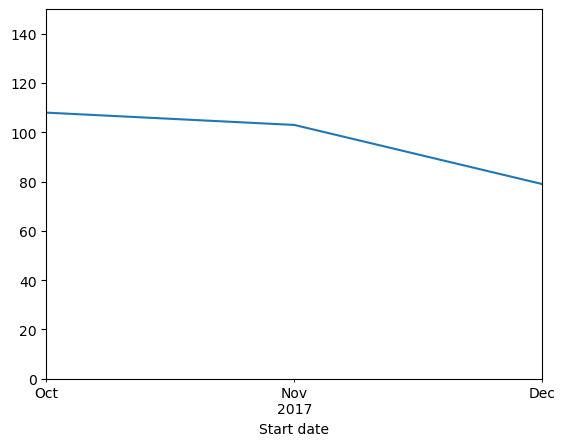

In [81]:
#rides by months
import matplotlib.pyplot as plt
monthly_rides = df.resample('ME', on = 'Start date')['Member type']
print(monthly_rides.value_counts() / monthly_rides.size())

plot = df.resample('ME', on = 'Start date').size().plot(ylim=[0, 150])
plt.show


In [97]:
#transforming naive datetime to aware datetime
df['End date'] = df['End date'].dt.tz_localize('Europe/London')
print(df['End date'].iloc[0])


#converting datetime timezone
df['End date'] = df['End date'].dt.tz_convert('Africa/Accra')
print(df['End date'].iloc[0])


2017-10-01 15:26:26+01:00
2017-10-01 14:26:26+00:00


rpd
Friday       724.5
Monday       810.5
Saturday     462.0
Sunday       902.5
Thursday     652.0
Tuesday      641.5
Wednesday    585.0
Name: Duration seconds, dtype: float64


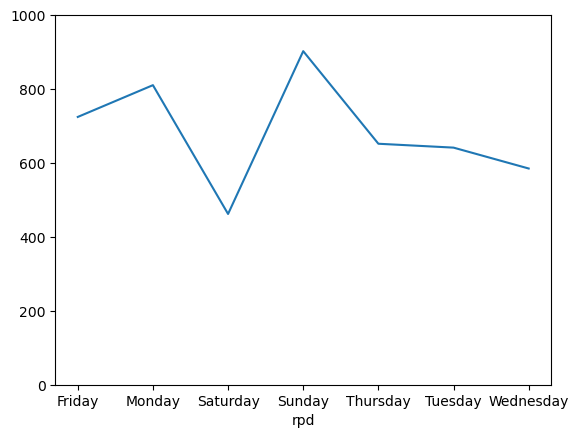

In [111]:
#finding the highest duration(sec) median rides per day

df['Duration seconds'] = df['Total duration'].dt.total_seconds() #convert tiime to seconds

df['rpd'] = df['Start date'].dt.day_name()
print(df.groupby('rpd')['Duration seconds'].median())

df.groupby('rpd')['Duration seconds'].median().plot(ylim = [0,1000])
plt.show()

In [137]:
#average time (hrs) bike spent on dock begtween rides

df['time_elapsed'] = df['Start date'] - df['End date'].shift(1)
df['time_elapsed'] = df['time_elapsed'].dt.total_seconds()
mr = df.resample('ME', on = 'Start date')
print(mr['time_elapsed'].mean() / (60*60))

Start date
2017-10-31 00:00:00+00:00    6.519242
2017-11-30 00:00:00+00:00    7.266152
2017-12-31 00:00:00+00:00    9.202380
Freq: ME, Name: time_elapsed, dtype: float64


Contact me: deborahokorohdavid@gmail.com